# Regression and Assumptions

## Background
The Global Health Observatory (GHO) data repository under the World Health Organization (WHO) tracks health status and other related factors for all countries. This dataset is related to life expectancy and associated health factors for 193 countries, aggregated from the WHO, and corresponding economic data was collected from the United Nation website. This data spans the years of 2000 to 2015.

**Dataset**

`Life Expectancy Data.csv`

## Task
You've been tasked with answering a few questions that could highlight key factors in increasing life expectancy within a country. The following questions are meant to be a guide for your study but it is up to you to provide full support of your answer (i.e. ensure assumptions are met, explain when they can't be, interpret coefficients). All answers should be provided in the notebook with associated code.

**Question**

What can be said about the relationship between some of these predictor variables and `Life Expectancy`? Note: `Life Expectancy` should be your response variable.

**Bonus** 

What's the highest Adjusted $R^2$ you can achieve? Would this model work well on new data?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
from math import sqrt

df = pd.read_csv('Life Expectancy Data.csv')
df.head()

# I will not be building my model to predict the life expectancy of a country. I would like my findings to be more applicable.
# For this reason I intend to find the best course of action to take to increase life expectancy across the globe.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
# Delete columns that are not ideal predictors. This is to avoid dropping more data than necessary when dropping NA's.
# Percentage Expenditure is incomplete, but there is another similar measure that would be more reliable: Total Expenditure.
# GDP will vary based on the size of the country. It is also not a direct factor that can be acted upon.
# Population is incomplete, and is not a direct factor that can be acted upon.

df.drop('percentage expenditure', axis=1, inplace=True)
df.drop('Population', axis=1, inplace=True)
df.drop('Schooling', axis=1, inplace=True)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454


In [3]:
# Get rid of incomplete data
print(df.shape)
df = df.dropna()
print(df.shape)


# infant deaths, under-five deaths, and Income composition of resources cannot be 0
df = df[df['infant deaths'] != 0]
print(df.shape)
df = df[df['under-five deaths '] != 0]
print(df.shape)
df = df[df['Income composition of resources'] != 0]
print(df.shape)

(2938, 19)
(1853, 19)
(1334, 19)
(1334, 19)
(1300, 19)


In [4]:
# Check which year has the most complete data
df2015 = df[df['Year'] == 2015]
df2014 = df[df['Year'] == 2014]
df2013 = df[df['Year'] == 2013]
df2012 = df[df['Year'] == 2012]
df2011 = df[df['Year'] == 2011]
df2010 = df[df['Year'] == 2010]
df2009 = df[df['Year'] == 2009]
df2008 = df[df['Year'] == 2008]
df2007 = df[df['Year'] == 2007]
df2006 = df[df['Year'] == 2006]
df2005 = df[df['Year'] == 2005]
df2004 = df[df['Year'] == 2004]
df2003 = df[df['Year'] == 2003]
df2002 = df[df['Year'] == 2002]
df2001 = df[df['Year'] == 2001]
df2000 = df[df['Year'] == 2000]
print("2015: ", df2015.shape)
print("2014: ", df2014.shape)
print("2013: ", df2013.shape)
print("2012: ", df2012.shape)
print("2011: ", df2011.shape)
print("2010: ", df2010.shape)
print("2009: ", df2009.shape)
print("2008: ", df2008.shape)
print("2007: ", df2007.shape)
print("2006: ", df2006.shape)
print("2005: ", df2005.shape)
print("2004: ", df2004.shape)
print("2003: ", df2003.shape)
print("2002: ", df2002.shape)
print("2001: ", df2001.shape)
print("2000: ", df2000.shape)

2015:  (1, 19)
2014:  (101, 19)
2013:  (101, 19)
2012:  (100, 19)
2011:  (102, 19)
2010:  (101, 19)
2009:  (100, 19)
2008:  (100, 19)
2007:  (97, 19)
2006:  (92, 19)
2005:  (86, 19)
2004:  (80, 19)
2003:  (73, 19)
2002:  (65, 19)
2001:  (54, 19)
2000:  (47, 19)


In [5]:
# 2014 is the most recent year, and is essentially tied for the most data, so we will use 2014 for analysis
df = df[df['Year'] == 2014]
df.head()
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources'],
      dtype='object')

In [6]:
df.columns

# Clean up column names

df['Life_Expectancy'] = df['Life expectancy ']
df.drop('Life expectancy ', axis=1, inplace=True)
df['Adult_Mortality'] = df['Adult Mortality']
df.drop('Adult Mortality', axis=1, inplace=True)
df['Infant_Deaths'] = df['infant deaths']
df.drop('infant deaths', axis=1, inplace=True)
df['HepatitisB'] = df['Hepatitis B']
df.drop('Hepatitis B', axis=1, inplace=True)
df['Measles'] = df['Measles ']
df.drop('Measles ', axis=1, inplace=True)
df['BMI'] = df[' BMI ']
df.drop(' BMI ', axis=1, inplace=True)
df['Under_Five_Deaths'] = df['under-five deaths ']
df.drop('under-five deaths ', axis=1, inplace=True)
df['Expenditure'] = df['Total expenditure']
df.drop('Total expenditure', axis=1, inplace=True)
df['Diphtheria'] = df['Diphtheria ']
df.drop('Diphtheria ', axis=1, inplace=True)
df['HIV_AIDS'] = df[' HIV/AIDS']
df.drop(' HIV/AIDS', axis=1, inplace=True)
df['Thin_nineteen'] = df[' thinness  1-19 years']
df.drop(' thinness  1-19 years', axis=1, inplace=True)
df['Thin_five_nine'] = df[' thinness 5-9 years']
df.drop(' thinness 5-9 years', axis=1, inplace=True)
df['HDI'] = df['Income composition of resources']
df.drop('Income composition of resources', axis=1, inplace=True)


In [7]:
# Exclude Adult Mortality because it is not a direct factor that can be changed.
# Exclude Status because it is too abstract to change, and would be a result of improvements in other areas.
# Exclude Infant Deaths and Under-five Deaths because they are not factors of death. They don't cause death, but are another measurement of death.
# I also did run a regression on Infant Deaths alone and it had low R-squared and low statistical significance.

# Try a few different variables to see which variables would likely be best to consider in the model

results = smf.ols('Life_Expectancy ~ BMI', data=df).fit()
results.summary()

# BMI has a good R-squared (describe much of the data), and is statistically significant. I will include it in the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     70.88
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           3.01e-13
Time:                        19:33:42   Log-Likelihood:                -332.54
No. Observations:                 101   AIC:                             669.1
Df Residuals:                      99   BIC:                             674.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.1632      1.443     40.294      0.000      55.299      61.027
BMI            0.2819      0.033      8.419      0.000       0.215       0.348
==============================================================================
Omnibus:                        3.333   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                2.808
Skew:                           0.266   Prob(JB):                        0.246
Kurtosis:                       3.620   Cond. No.                         95.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
results = smf.ols('Life_Expectancy ~ HepatitisB', data=df).fit()
results.summary()

# Hepatitis B has a low R-squared but is statistically significant. I will cosider it in the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     9.505
Date:                Wed, 08 Jun 2022   Prob (F-statistic):            0.00265
Time:                        19:33:42   Log-Likelihood:                -355.18
No. Observations:                 101   AIC:                             714.4
Df Residuals:                      99   BIC:                             719.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.4234      2.898     20.848      0.000      54.673      66.174
HepatitisB     0.1061      0.034      3.083      0.003       0.038       0.174
==============================================================================
Omnibus:                        0.574   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.751   Jarque-Bera (JB):                0.705
Skew:                          -0.086   Prob(JB):                        0.703
Kurtosis:                       2.628   Cond. No.                         298.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
results = smf.ols('Life_Expectancy ~ Measles', data=df).fit()
results.summary()

# Measles has an awful R-squared, and is statistically insignificant. I will exclude it from the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.02572
Date:                Wed, 08 Jun 2022   Prob (F-statistic):              0.873
Time:                        19:33:42   Log-Likelihood:                -359.79
No. Observations:                 101   AIC:                             723.6
Df Residuals:                      99   BIC:                             728.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.0275      0.881     78.379      0.000      67.280      70.775
Measles    -1.239e-05   7.72e-05     -0.160      0.873      -0.000       0.000
==============================================================================
Omnibus:                        4.636   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                2.795
Skew:                          -0.199   Prob(JB):                        0.247
Kurtosis:                       2.289   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
results = smf.ols('Life_Expectancy ~ Under_Five_Deaths', data=df).fit()
results.summary()

# Measles has an awful R-squared, and is statistically insignificant. I will exclude it from the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.315
Date:                Wed, 08 Jun 2022   Prob (F-statistic):             0.0404
Time:                        19:33:42   Log-Likelihood:                -357.65
No. Observations:                 101   AIC:                             719.3
Df Residuals:                      99   BIC:                             724.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            69.5840      0.886     78.562      0.000      67.827      71.341
Under_Five_Deaths    -0.0119      0.006     -2.077      0.040      -0.023      -0.001
==============================================================================
Omnibus:                        4.364   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                2.748
Skew:                          -0.208   Prob(JB):                        0.253
Kurtosis:                       2.308   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
results = smf.ols('Life_Expectancy ~ Polio', data=df).fit()
results.summary()

# Polio has a low R-squared but is statistically significant. I will cosider it in the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     13.47
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           0.000394
Time:                        19:33:42   Log-Likelihood:                -353.37
No. Observations:                 101   AIC:                             710.7
Df Residuals:                      99   BIC:                             716.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.4153      2.993     19.516      0.000      52.476      64.354
Polio          0.1307      0.036      3.670      0.000       0.060       0.201
==============================================================================
Omnibus:                        1.004   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.950
Skew:                           0.012   Prob(JB):                        0.622
Kurtosis:                       2.525   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
results = smf.ols('Life_Expectancy ~ Expenditure', data=df).fit()
results.summary()

# Expenditure has a low R-squared but is statistically significant. I will cosider it in the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     6.474
Date:                Wed, 08 Jun 2022   Prob (F-statistic):             0.0125
Time:                        19:33:42   Log-Likelihood:                -356.61
No. Observations:                 101   AIC:                             717.2
Df Residuals:                      99   BIC:                             722.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      63.9808      2.139     29.917      0.000      59.737      68.224
Expenditure     0.8501      0.334      2.544      0.012       0.187       1.513
==============================================================================
Omnibus:                        3.283   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                3.292
Skew:                          -0.419   Prob(JB):                        0.193
Kurtosis:                       2.717   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
results = smf.ols('Life_Expectancy ~ Alcohol', data=df).fit()
results.summary()

# Alcohol has a decent R-squared and is statistically significant, however, Alcohol will still be excluded from the model.
# Alcohol is a toxin. It has been proven to lead to poor health.
# I assume that there is a correlation that Alcohol is more available in developed countries.
# These countries have a higher life expectancy for other reasons.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     36.90
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           2.32e-08
Time:                        19:33:42   Log-Likelihood:                -343.81
No. Observations:                 101   AIC:                             691.6
Df Residuals:                      99   BIC:                             696.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.8367      0.898     73.348      0.000      64.056      67.618
Alcohol        1.3059      0.215      6.074      0.000       0.879       1.732
==============================================================================
Omnibus:                        5.520   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                4.872
Skew:                          -0.476   Prob(JB):                       0.0875
Kurtosis:                       3.503   Cond. No.                         5.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
results = smf.ols('Life_Expectancy ~ HIV_AIDS', data=df).fit()
results.summary()

# HIV/AIDS describes the data very well and hase high statistical significance. I will include it in the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     65.75
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           1.40e-12
Time:                        19:33:42   Log-Likelihood:                -334.09
No. Observations:                 101   AIC:                             672.2
Df Residuals:                      99   BIC:                             677.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.1442      0.770     93.734      0.000      70.617      73.671
HIV_AIDS      -3.1275      0.386     -8.109      0.000      -3.893      -2.362
==============================================================================
Omnibus:                        3.338   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                2.679
Skew:                          -0.352   Prob(JB):                        0.262
Kurtosis:                       3.376   Cond. No.                         2.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
results = smf.ols('Life_Expectancy ~ Thin_nineteen', data=df).fit()
results.summary()

# Thin_nineteen has a high significance and a decent R-squared. I will consider it in the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     18.43
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           4.12e-05
Time:                        19:33:42   Log-Likelihood:                -351.18
No. Observations:                 101   AIC:                             706.4
Df Residuals:                      99   BIC:                             711.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        72.9282      1.208     60.377      0.000      70.532      75.325
Thin_nineteen    -0.7539      0.176     -4.293      0.000      -1.102      -0.405
==============================================================================
Omnibus:                        3.727   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.155   Jarque-Bera (JB):                2.822
Skew:                          -0.270   Prob(JB):                        0.244
Kurtosis:                       2.385   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
results = smf.ols('Life_Expectancy ~ HDI', data=df).fit()
results.summary()

# HDI describes a large amount of the data and is very statistically significant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     395.6
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           2.34e-36
Time:                        19:33:42   Log-Likelihood:                -278.57
No. Observations:                 101   AIC:                             561.1
Df Residuals:                      99   BIC:                             566.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.6568      1.671     21.943      0.000      33.342      39.972
HDI           50.1491      2.521     19.889      0.000      45.146      55.152
==============================================================================
Omnibus:                        8.404   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.101
Skew:                          -0.663   Prob(JB):                       0.0174
Kurtosis:                       3.411   Cond. No.                         9.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Run a regression with the best variables

results = smf.ols('Life_Expectancy ~ BMI + HIV_AIDS + HDI', data=df).fit()
results.summary()

# Remove BMI. It carries essentially no significance in the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     196.2
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           4.78e-41
Time:                        19:33:42   Log-Likelihood:                -261.06
No. Observations:                 101   AIC:                             530.1
Df Residuals:                      97   BIC:                             540.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5249      1.787     23.796      0.000      38.978      46.072
BMI           -0.0054      0.024     -0.223      0.824      -0.054       0.043
HIV_AIDS      -1.3552      0.214     -6.337      0.000      -1.780      -0.931
HDI           43.4891      3.328     13.069      0.000      36.885      50.094
==============================================================================
Omnibus:                       18.035   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.873
Skew:                          -0.836   Prob(JB):                     2.41e-06
Kurtosis:                       4.832   Cond. No.                         490.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
results = smf.ols('Life_Expectancy ~ HIV_AIDS + HDI', data=df).fit()
results.summary()

# Removing BMI did not decrease the model's ability to describe the data.
# This model has high significance for both HIV/AIDS and HDI, and R-squared is high.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     297.1
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           2.51e-42
Time:                        19:33:42   Log-Likelihood:                -261.08
No. Observations:                 101   AIC:                             528.2
Df Residuals:                      98   BIC:                             536.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6446      1.697     25.137      0.000      39.278      46.011
HIV_AIDS      -1.3552      0.213     -6.368      0.000      -1.778      -0.933
HDI           42.9797      2.410     17.831      0.000      38.196      47.763
==============================================================================
Omnibus:                       17.999   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.862
Skew:                          -0.833   Prob(JB):                     2.42e-06
Kurtosis:                       4.836   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Consider including some of the decent variables

results = smf.ols('Life_Expectancy ~ HIV_AIDS + HDI + HepatitisB', data=df).fit()
results.summary()

# Hepatitis B was not significant, and barely increased R-squared.
# Including it will only increase the likelihood the the model is overtrained.
# BMI is nowhere near being significant, we will exclude it from the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           1.70e-41
Time:                        19:33:43   Log-Likelihood:                -259.98
No. Observations:                 101   AIC:                             528.0
Df Residuals:                      97   BIC:                             538.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.3638      1.900     21.766      0.000      37.592      45.135
HIV_AIDS      -1.3255      0.213     -6.236      0.000      -1.747      -0.904
HDI           42.3458      2.435     17.388      0.000      37.512      47.179
HepatitisB     0.0205      0.014      1.463      0.147      -0.007       0.048
==============================================================================
Omnibus:                       19.410   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.476
Skew:                          -0.848   Prob(JB):                     2.41e-07
Kurtosis:                       5.090   Cond. No.                         763.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
results = smf.ols('Life_Expectancy ~ HIV_AIDS + HDI + Expenditure', data=df).fit()
results.summary()

# While Expenditure is very Significant, it did improved R-squared. I will remove Expenditure from the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     209.4
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           3.15e-42
Time:                        19:33:43   Log-Likelihood:                -258.22
No. Observations:                 101   AIC:                             524.4
Df Residuals:                      97   BIC:                             534.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      41.4767      1.729     23.993      0.000      38.046      44.908
HIV_AIDS       -1.3661      0.208     -6.569      0.000      -1.779      -0.953
HDI            41.9849      2.392     17.553      0.000      37.238      46.732
Expenditure     0.3086      0.130      2.379      0.019       0.051       0.566
==============================================================================
Omnibus:                       32.757   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.604
Skew:                          -1.184   Prob(JB):                     8.54e-18
Kurtosis:                       6.616   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
results = smf.ols('Life_Expectancy ~ HIV_AIDS + HDI + Thin_nineteen', data=df).fit()
results.summary()

# Thin_nineteen is insignificant and did not improve the model's ability to describe the data. It will be removed.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           3.99e-41
Time:                        19:33:44   Log-Likelihood:                -260.87
No. Observations:                 101   AIC:                             529.7
Df Residuals:                      97   BIC:                             540.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        43.4599      2.121     20.493      0.000      39.251      47.669
HIV_AIDS         -1.3744      0.216     -6.377      0.000      -1.802      -0.947
HDI              42.1733      2.723     15.490      0.000      36.770      47.577
Thin_nineteen    -0.0529      0.082     -0.644      0.521      -0.216       0.110
==============================================================================
Omnibus:                       18.686   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.343
Skew:                          -0.854   Prob(JB):                     1.15e-06
Kurtosis:                       4.892   Cond. No.                         73.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
results = smf.ols('Life_Expectancy ~ HIV_AIDS + HDI + Polio', data=df).fit()
results.summary()

# Polio exhibits a poor level of significance and did not improve R-squared. It will be removed from the model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     197.7
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           3.43e-41
Time:                        19:33:45   Log-Likelihood:                -260.71
No. Observations:                 101   AIC:                             529.4
Df Residuals:                      97   BIC:                             539.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.8455      1.944     21.528      0.000      37.988      45.703
HIV_AIDS      -1.3249      0.216     -6.130      0.000      -1.754      -0.896
HDI           42.5421      2.469     17.233      0.000      37.642      47.442
Polio          0.0130      0.015      0.846      0.399      -0.017       0.043
==============================================================================
Omnibus:                       18.999   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.273
Skew:                          -0.859   Prob(JB):                     7.25e-07
Kurtosis:                       4.942   Cond. No.                         761.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
results = smf.ols('Life_Expectancy ~ HIV_AIDS + HDI', data=df).fit()
results.summary()

# Colinearity is not a concern with this model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     297.1
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           2.51e-42
Time:                        19:33:46   Log-Likelihood:                -261.08
No. Observations:                 101   AIC:                             528.2
Df Residuals:                      98   BIC:                             536.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6446      1.697     25.137      0.000      39.278      46.011
HIV_AIDS      -1.3552      0.213     -6.368      0.000      -1.778      -0.933
HDI           42.9797      2.410     17.831      0.000      38.196      47.763
==============================================================================
Omnibus:                       17.999   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.862
Skew:                          -0.833   Prob(JB):                     2.42e-06
Kurtosis:                       4.836   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

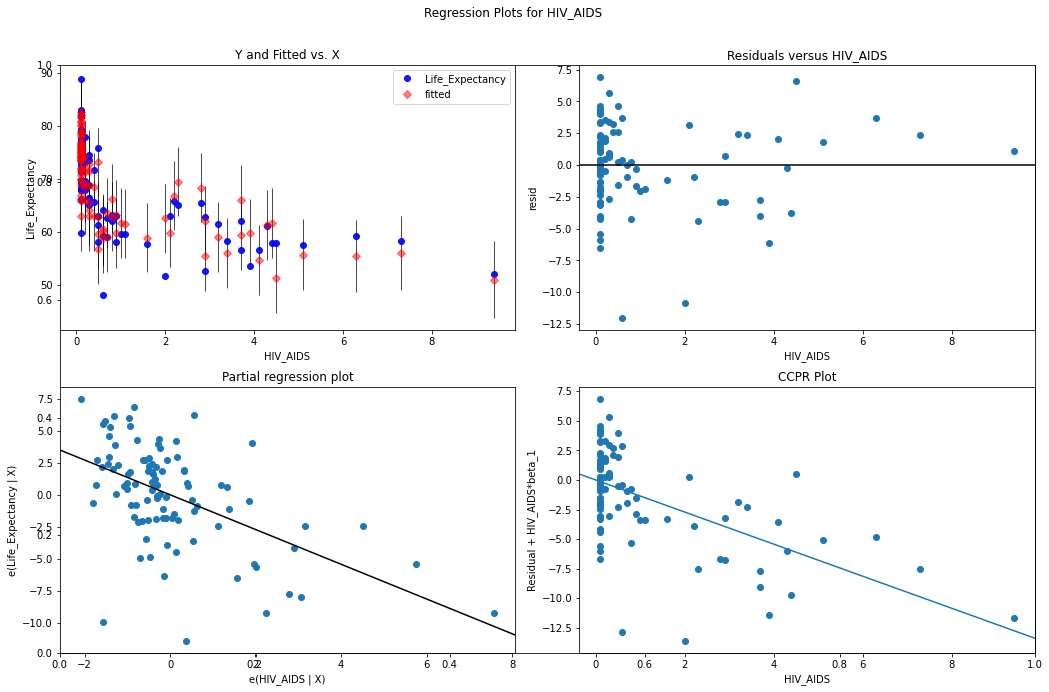

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'HIV_AIDS', fig=fig)
plt.show()

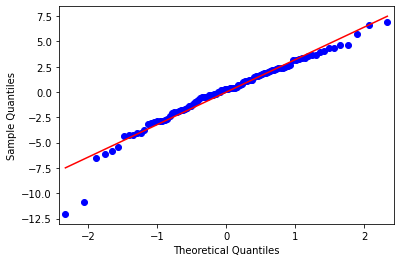

In [25]:
fig = sm.qqplot(results.resid, line="s")

In [26]:
# The data appears to be linear. We will not run any transformations.
# The data is normally distributed, except for a few low outliers. We will deal with those later.
# There is no correlation of errors. The error term of no observation is affected or predictable based on another observation.
# The data is heteroskedastic, meaning that the error is not constant throughout the data.
# I will perform a square root transformation on the Life Expectancy variable to make the data homoskedastic.

results = smf.ols('np.sqrt(Life_Expectancy) ~ HIV_AIDS + HDI', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.sqrt(Life_Expectancy)   R-squared:                       0.855
Model:                                  OLS   Adj. R-squared:                  0.852
Method:                       Least Squares   F-statistic:                     288.3
Date:                      Wed, 08 Jun 2022   Prob (F-statistic):           8.83e-42
Time:                              19:33:49   Log-Likelihood:                 20.316
No. Observations:                       101   AIC:                            -34.63
Df Residuals:                            98   BIC:                            -26.79
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7132      0.105     64.177      0.000       6.506       6.921
HIV_AIDS      -0.0861      0.013     -6.564      0.000      -0.112      -0.060
HDI            2.5799      0.149     17.359      0.000       2.285       2.875
==============================================================================
Omnibus:                       28.794   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.988
Skew:                          -1.113   Prob(JB):                     2.56e-13
Kurtosis:                       5.970   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

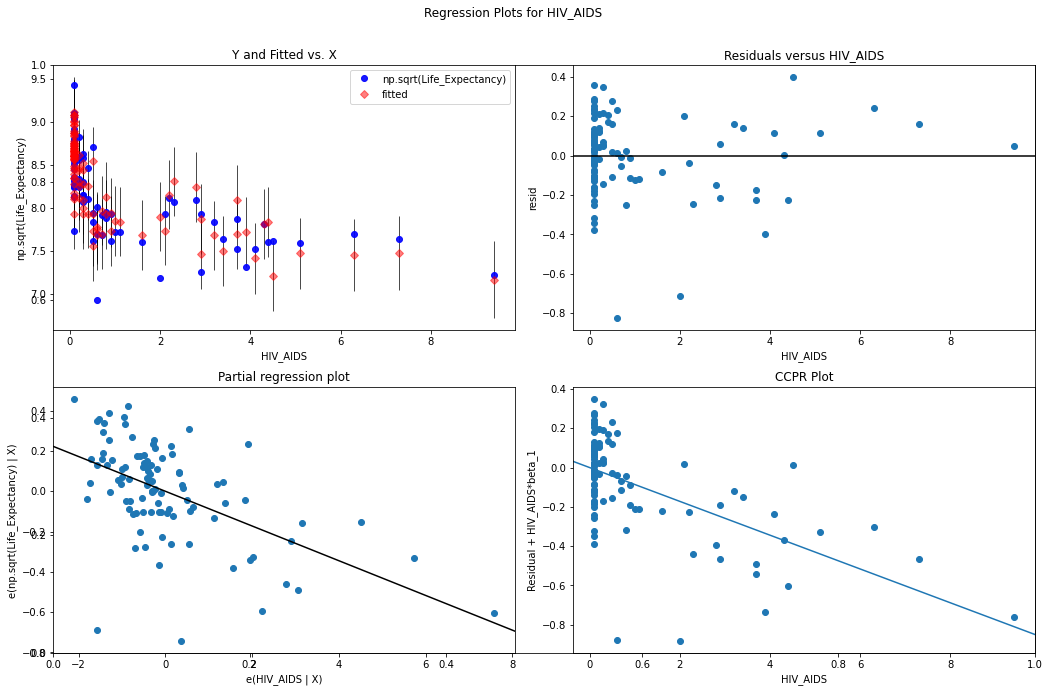

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'HIV_AIDS', fig=fig)
plt.show()

Text(0, 0.5, 'Studentized Residuals')

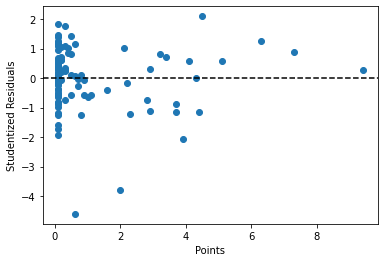

In [28]:
# Performing this transformation helped increase the homoskedasticity of the data.
# It seems slightly heteroskedastic because there are too few observations with high values for the HIV/AIDS variable.
# Now I will address the low outliers.

stud_res = results.outlier_test()
y = stud_res['student_resid']
x = df['HIV_AIDS']
plt.scatter(x, y)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Points')
plt.ylabel('Studentized Residuals')

# There are two low outliers, however, I don't have any other information about them so removing them is not best.
# It should be noted that there are outliers.

In [29]:
df.shape

(101, 19)

In [30]:
p = 1
n = df.shape[0]
(p+1)/n

0.019801980198019802

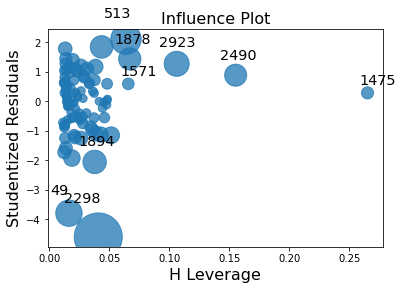

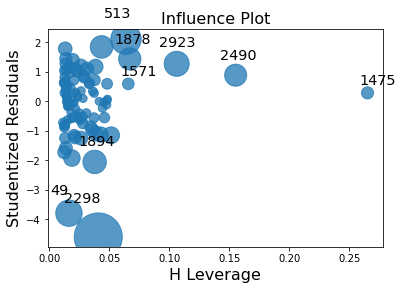

In [31]:
sm.graphics.influence_plot(results)
# As can be seen, there are a few high leverage points.
# I attempted a log transformation of the HIV/AIDS variable, but this only increased the high leverage points.
# No transformation will be done.

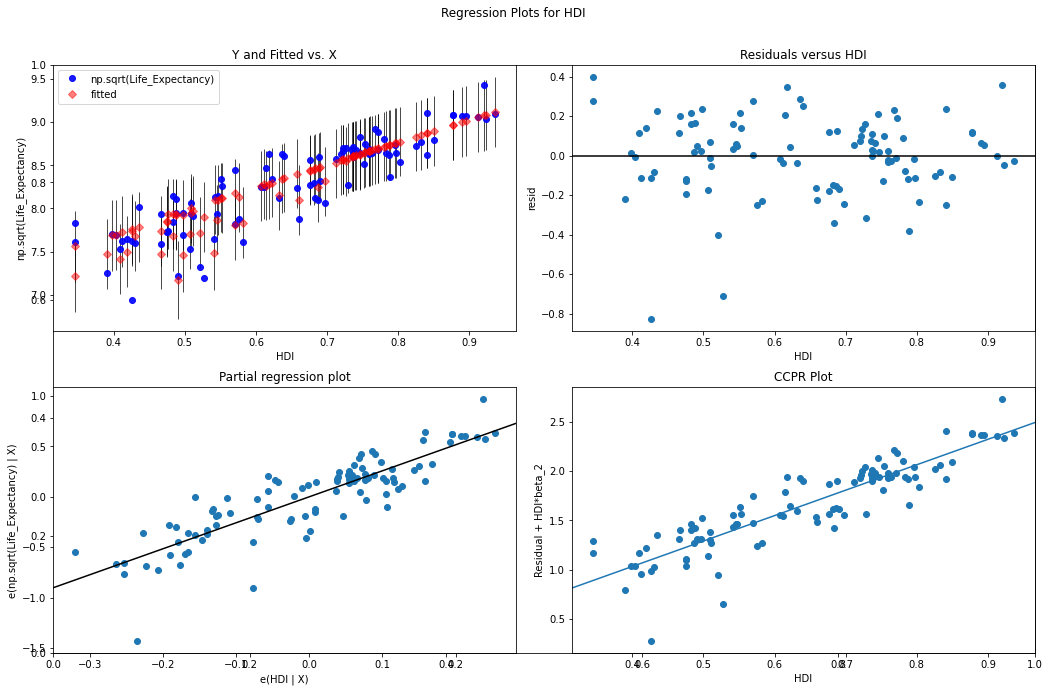

In [32]:
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results,'HDI', fig=fig)
plt.show()

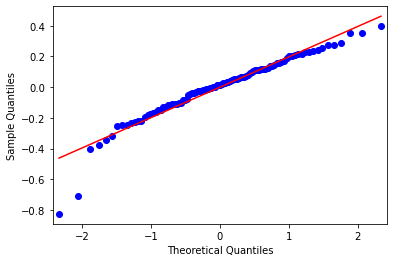

In [33]:
fig = sm.qqplot(results.resid, line="s")

In [34]:
# The data appears to be linear. We will not run any transformations.
# The data is normally distributed, except for a few low outliers. We will deal with those later.
# There is no correlation of errors. The error term of no observation is affected or predictable based on another observation.
# The data is homoskedastic, meaning that the error is constant throughout the data.
# No transformations are needed in any of theses areas.

Text(0, 0.5, 'Studentized Residuals')

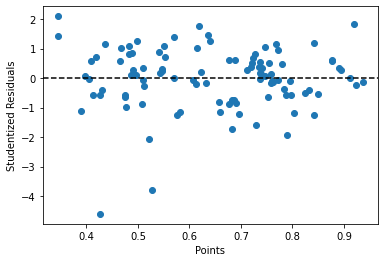

In [35]:
stud_res = results.outlier_test()
y = stud_res['student_resid']
x = df['HDI']
plt.scatter(x, y)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Points')
plt.ylabel('Studentized Residuals')

# There are two low outliers, however, I don't have any other information about them so removing them is not best.
# It should be noted that there are outliers.

In [36]:
p = 1
n = df.shape[0]
(p+1)/n

0.019801980198019802

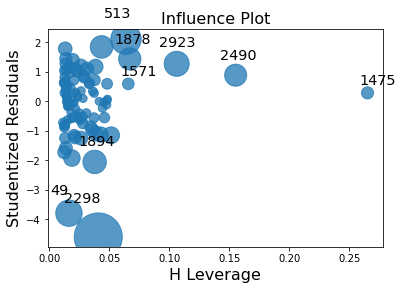

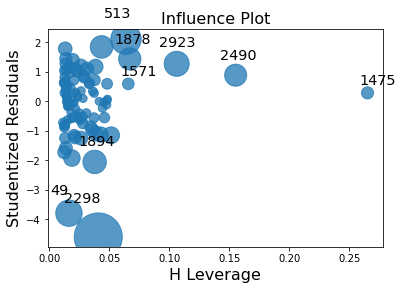

In [37]:
sm.graphics.influence_plot(results)
# As can be seen, there are a few high leverage points.
# I attempted a log transformation of the HDI variable, but this only increased the high leverage points.
# No transformation will be done.

This data shows that there is a strong relationship between the Human Development Index, HIV/AIDS, and Life expectancy. The Human Development Index (HDI) has a strong positive correlation with life expectancy. HIV/AIDS has a strong negative correlation with life expectancy. When trying to increase life expectancy in various countries HIV/AIDS should be acted upon. The HDI is composed of various factors that can be influenced long term. Actions should be taken to improve a country's HDI to improve life expectancy in the country.